# Introduction

In [93]:
square_area(a) = a * a

square_area (generic function with 1 method)

In [94]:
code_native(square_area, (Int32,))

	.section	__TEXT,__text,regular,pure_instructions
Filename: In[93]
	pushq	%rbp
	movq	%rsp, %rbp
Source line: 1
	imull	%edi, %edi
	movl	%edi, %eax
	popq	%rbp
	retq
	nopl	(%rax,%rax)


In [124]:
N = 10_000_000
a = float.(collect(1:N))

sum(a)
@time sum(a)

  0.005179 seconds (5 allocations: 176 bytes)


5.0000005e13

In [120]:
function mysum(a)
    result = zero(eltype(a))
    for x in a
        result += x
    end
    result
end

mysum (generic function with 1 method)

First time it is compiled

In [112]:
mysum(a)

5.0000005e13

In [125]:
@time mysum(a)

  0.010983 seconds (5 allocations: 176 bytes)


5.0000005e13

In [136]:
using PyCall

py"""
def pymysum(a):
    result = 0
    for x in a:
        result += x
    return result
"""

pymysum = py"pymysum"

PyObject <function pymysum at 0x125f66a60>

In [138]:
@time pymysum(a)

  1.114607 seconds (28 allocations: 1.016 KiB)


5.0000005e13

In [140]:
@pyimport numpy as np

In [142]:
@time np.sum(a)

  0.006432 seconds (28 allocations: 1.016 KiB)


5.0000005e13

In [134]:
@less sum(a)

# This file is a part of Julia. License is MIT: https://julialang.org/license

## reductions ##

###### Generic (map)reduce functions ######

if Int === Int32
const SmallSigned = Union{Int8,Int16}
const SmallUnsigned = Union{UInt8,UInt16}
else
const SmallSigned = Union{Int8,Int16,Int32}
const SmallUnsigned = Union{UInt8,UInt16,UInt32}
end

const CommonReduceResult = Union{UInt64,UInt128,Int64,Int128,Float32,Float64}
const WidenReduceResult = Union{SmallSigned, SmallUnsigned, Float16}

# r_promote_type: promote T to the type of reduce(op, ::Array{T})
# (some "extra" methods are required here to avoid ambiguity warnings)
r_promote_type(op, ::Type{T}) where {T} = T
r_promote_type(op, ::Type{T}) where {T<:WidenReduceResult} = widen(T)
r_promote_type(::typeof(+), ::Type{T}) where {T<:WidenReduceResult} = widen(T)
r_promote_type(::typeof(*), ::Type{T}) where {T<:WidenReduceResult} = widen(T)
r_promote_type(::typeof(+), ::Type{T}) where {T<:Number} = typeof(zero(T)+zero(T))
r_promote_type(::t

Returns the sum of all elements in a collection.

```jldoctest
julia> sum(1:20)
210
```
"""
sum(a) = mapreduce(identity, +, a)
sum(a::AbstractArray{Bool}) = countnz(a)


# Kahan (compensated) summation: O(1) error growth, at the expense
# of a considerable increase in computational expense.

"""
    sum_kbn(A)

Returns the sum of all elements of `A`, using the Kahan-Babuska-Neumaier compensated
summation algorithm for additional accuracy.
"""
function sum_kbn(A)
    T = _default_eltype(typeof(A))
    c = r_promote(+, zero(T)::T)
    i = start(A)
    if done(A, i)
        return c
    end
    Ai, i = next(A, i)
    s = Ai - c
    while !(done(A, i))
        Ai, i = next(A, i)
        t = s + Ai
        if abs(s) >= abs(Ai)
            c -= ((s-t) + Ai)
        else
            c -= ((Ai-t) + s)
        end
        s = t
    end
    s - c
end

## prod
"""
    prod(f, itr)

Returns the product of `f` applied to each element of `itr`.

```jldoctest
julia> prod(abs2, [2; 3; 4])
576
```
"""


python's `main()` can be found here: https://github.com/python/cpython/blob/master/Programs/python.c

```C
/* Minimal main program -- everything is loaded from the library */

#include "Python.h"

#ifdef MS_WINDOWS
int
wmain(int argc, wchar_t **argv)
{
    return Py_Main(argc, argv);
}
#else
int
main(int argc, char **argv)
{
    return _Py_UnixMain(argc, argv);
}
#endif
```

# Highlights

Can, and should, write type-agnostic functions (implicit templates):

In [153]:
code_native(square_area, (Int32,))

	.section	__TEXT,__text,regular,pure_instructions
Filename: In[93]
	pushq	%rbp
	movq	%rsp, %rbp
Source line: 1
	imull	%edi, %edi
	movl	%edi, %eax
	popq	%rbp
	retq
	nopl	(%rax,%rax)


In [154]:
code_native(square_area, (Float64,))

	.section	__TEXT,__text,regular,pure_instructions
Filename: In[93]
	pushq	%rbp
	movq	%rsp, %rbp
Source line: 1
	mulsd	%xmm0, %xmm0
	popq	%rbp
	retq
	nopw	(%rax,%rax)


In [155]:
function mysum(a)
    result = zero(eltype(a))
    for x in a
        result += x
    end
    result
end

mysum (generic function with 1 method)

# Crash-course

In [89]:
square_area(a) = a * a

square_area (generic function with 1 method)

In [90]:
code_native(square_area, (Int32,))

	.section	__TEXT,__text,regular,pure_instructions
Filename: In[89]
	pushq	%rbp
	movq	%rsp, %rbp
Source line: 1
	imull	%edi, %edi
	movl	%edi, %eax
	popq	%rbp
	retq
	nopl	(%rax,%rax)


In [91]:
code_native(square_area, (Float64,))

	.section	__TEXT,__text,regular,pure_instructions
Filename: In[89]
	pushq	%rbp
	movq	%rsp, %rbp
Source line: 1
	mulsd	%xmm0, %xmm0
	popq	%rbp
	retq
	nopw	(%rax,%rax)


In [17]:
2

2

In [18]:
2 + 1im

2 + 1im

In [20]:
1im^2

-1 + 0im

In [21]:
2//3

2//3

In [22]:
pi

π = 3.1415926535897...

In [25]:
2π

6.283185307179586

In [26]:
2(3+2)

10

In [27]:
5 / 2

2.5

In [28]:
5 ÷ 2

2

In [29]:
1 / 0

Inf

In [30]:
2 << 1

4

Constants have constant *type*.

In [31]:
const constant = 3

3

In [32]:
constant = 4

4

In [33]:
constant = 3.14

LoadError: [91minvalid redefinition of constant constant[39m

## Arrays

In [34]:
a = [4, 5, 6]

3-element Array{Int64,1}:
 4
 5
 6

In [35]:
a[1]

4

In [36]:
a = [4; 5; 6]

3-element Array{Int64,1}:
 4
 5
 6

In [37]:
a[end]

6

In [38]:
a[end - 1]

5

In [39]:
a[]

4

In [40]:
a[[1, 3]]

2-element Array{Int64,1}:
 4
 6

In [41]:
a[[true, false, true]]

2-element Array{Int64,1}:
 4
 6

In [42]:
1:5

1:5

In [43]:
collect(1:5)

5-element Array{Int64,1}:
 1
 2
 3
 4
 5

In [44]:
a[1:3]

3-element Array{Int64,1}:
 4
 5
 6

In [45]:
a[2:end]

2-element Array{Int64,1}:
 5
 6

In [46]:
a[end:-1:1]

3-element Array{Int64,1}:
 6
 5
 4

In [47]:
a[1] = 0

0

In [48]:
a

3-element Array{Int64,1}:
 0
 5
 6

In [49]:
matrix = [1 2; 3 4]

2×2 Array{Int64,2}:
 1  2
 3  4

In [50]:
matrix = [1 2
          3 4]

2×2 Array{Int64,2}:
 1  2
 3  4

In [51]:
b = Int8[4, 5, 6]

3-element Array{Int8,1}:
 4
 5
 6

In [52]:
10a

3-element Array{Int64,1}:
  0
 50
 60

In [53]:
matrix * [10, 20]

2-element Array{Int64,1}:
  50
 110

Julia distinguishes row and column vectors:

In [54]:
x = [1, 2]

2-element Array{Int64,1}:
 1
 2

In [55]:
y = [1 2]

1×2 Array{Int64,2}:
 1  2

In [56]:
x * y

2×2 Array{Int64,2}:
 1  2
 2  4

In [57]:
y * x

1-element Array{Int64,1}:
 5

In [58]:
matrix'

2×2 Array{Int64,2}:
 1  3
 2  4

In [59]:
[1, 2] * [3, 4]

LoadError: [91mDimensionMismatch("Cannot multiply two vectors")[39m

Use the so-called dot operators to perform operations element-wise

In [60]:
[1, 2] .* [3, 4]

2-element Array{Int64,1}:
 3
 8

Dot operators support broadcasting - singleton dimensions are automatically expanded

In [61]:
[1 2; 3 4] .* [10, 20]

2×2 Array{Int64,2}:
 10  20
 60  80

In [62]:
[1 2; 3 4] .* [10 10; 20 20]

2×2 Array{Int64,2}:
 10  20
 60  80

In [63]:
a

3-element Array{Int64,1}:
 0
 5
 6

In [64]:
a .= 7

3-element Array{Int64,1}:
 7
 7
 7

In [65]:
b = [1, 2, 3]
c = [10, 20, 30]

3-element Array{Int64,1}:
 10
 20
 30

In [66]:
a .= b .* c

3-element Array{Int64,1}:
 10
 40
 90

In [67]:
@. a = b * c

3-element Array{Int64,1}:
 10
 40
 90

In [68]:
a[a.>20]

2-element Array{Int64,1}:
 40
 90

## Strings

In [69]:
s = "This is a string."

"This is a string."

In [70]:
"""You can
have multiline strings, too."""

"You can\nhave multiline strings, too."

In [71]:
'a'

'a': ASCII/Unicode U+0061 (category Ll: Letter, lowercase)

In [72]:
s[1]

'T': ASCII/Unicode U+0054 (category Lu: Letter, uppercase)

In [73]:
s[1:4]

"This"

In [74]:
utf8string = "Θεσσαλονίκη"

"Θεσσαλονίκη"

In [75]:
utf8string[1]

'Θ': Unicode U+0398 (category Lu: Letter, uppercase)

In [76]:
utf8string[2]

LoadError: [91mUnicodeError: invalid character index 2 (0x98 is a continuation byte)[39m

In [77]:
[ c for c in utf8string ]

11-element Array{Char,1}:
 'Θ'
 'ε'
 'σ'
 'σ'
 'α'
 'λ'
 'ο'
 'ν'
 'ί'
 'κ'
 'η'

In [78]:
s[1] = "T"

LoadError: [91mMethodError: no method matching setindex!(::String, ::String, ::Int64)[39m

`$` is used for interpolation.

In [79]:
"pi is $pi"

"pi is π = 3.1415926535897..."

In [80]:
"2 + 2 = $(2 + 2)"

"2 + 2 = 4"

In [81]:
@printf "%d is less than %f" 4.5 5.3

5 is less than 5.300000

In [82]:
@sprintf "%d is less than %f" 4.5 5.3

"5 is less than 5.300000"

In [83]:
print("Print without newline... ")
println("Print with newline at the end.")

Print without newline... Print with newline at the end.


In [84]:
"one" * "two"

"onetwo"

In [85]:
"one"^3

"oneoneone"

In [86]:
ismatch(r"^\s*(?:#|$)", "not a comment")

false

In [87]:
ismatch(r"^\s*(?:#|$)", "# a comment")

true

In [88]:
b"abc"

3-element Array{UInt8,1}:
 0x61
 0x62
 0x63

In [ ]:

##############
# Collections
##############

a = [] # => Any[]
# Any is the supertype of all types  (more on that later).
# This means, that this vector can hold anything.

# Add stuff to the end of a with push! (single element)
# and append! (another collection)
push!(a, 1)     # => Any[1]
push!(a, 2)     # => Any[1,2]
push!(a, 4)     # => Any[1,2,4]
push!(a, 3)     # => Any[1,2,4,3]
append!(a, ["six", π]) # => Any[1,2,4,3,"six",π = 3.14…]
# By convention, function names that end in exclamations points indicate that
# they modify their arguments. Usually it is the first argument being modified.

# Remove from the end with pop
pop!(a) # => π = 3.14…
a # => [1,2,4,3,"six"]

# we also have shift and unshift
shift!(a) # => 1
a # => [2,4,3,"six"]
unshift!(a, 7) # => [7,2,4,3,"six"]

# Remove elements from an array by index with splice!
splice!(a, 2) # => 2
a # => [7,4,3,"six"]

# Check for existence in a list with in
in(1, a) # => false
3 in a # => true

# Examine the length with length
length(a) # => 4

# Sorting
arr = [5,4,6] # => 3-element Int64 Array: [5,4,6]
sort(arr) # => [4,5,6]
arr # => [5,4,6]
sort!(arr) # => [4,5,6]
arr # => [4,5,6]


# Tuples are immutable.
tup = (1, 2, 3) # => (1,2,3) # an (Int64,Int64,Int64) tuple.
tup[1] # => 1
try:
    tup[1] = 3 # => ERROR: MethodError: no method matching
               #    setindex!(::Tuple{Int64,Int64,Int64}, ::Int64, ::Int64)
catch e
    println(e)
end

# Many list functions also work on tuples
length(tup) # => 3
tup[1:2] # => (1,2)
2 in tup # => true

# You can unpack tuples into variables
a, b, c = (1, 2, 3) # => (1,2,3)
a # => 1
b # => 2
c # => 3

# Tuples are created even if you leave out the parentheses
d, g, h = 4, 5, 6 # => (4,5,6)

# A 1-element tuple is distinct from the value it contains
(1,) == 1 # => false
(1) == 1 # => true

# Look how easy it is to swap two values
g, d = d, g  # => (4,5)
g # => 4
d # => 5


# Dictionaries store mappings
empty_dict = Dict() # => Dict{Any,Any} with 0 entries

# You can create a dictionary using a literal
filled_dict = Dict("one"=> 1, "two"=> 2, "three"=> 3)
# => Dict{String,Int64}

# Look up values with []
filled_dict["one"] # => 1

# Get all keys
keys(filled_dict) # => Base.KeyIterator for a Dict{String,Int64} with 3 entries.
                  #    Keys:
                  #     "two"
                  #     "one"
                  #     "three"
# Note - dictionary keys are not sorted or in the order you inserted them.

# Get all values
values(filled_dict) # => Base.ValueIterator for a Dict{String,Int64} with
                    #    3 entries. Values:
                    #     2
                    #     1
                    #     3
# Note - Same as above regarding key ordering.

# Check for existence of keys in a dictionary with in, haskey
in(("one" => 1), filled_dict) # => true
("two" => 3) in filled_dict # => false
haskey(filled_dict, "one") # => true
haskey(filled_dict, 1) # => false

# Trying to look up a non-existent key will raise an error
try
    filled_dict["four"] # => KeyError: key "four" not found
catch e
    println(e)
end

# Use the get method to avoid that error by providing a default value
# get(dictionary,key,default_value)
get(filled_dict, "one", 4) # => 1
get(filled_dict, "four", 4) # => 4

# Use Sets to represent collections of unordered, unique values
empty_set = Set() # => Set{Any}[]
# Initialize a set with values
filled_set = Set([1,2,2,3,4]) # => Set([4, 2, 3, 1])

# Add more values to a set
push!(filled_set, 5) # => Set{Int64}([4,2,3,5,1])
filled_set # => Set{Int64}([4,2,3,5,1])

# Check if the values are in the set
2 in filled_set # => true
10 in filled_set # => false

# There are functions for set intersection, union, and difference.
other_set = Set([3, 4, 5, 6]) # => Set{Int64}([4,3,5,6])
intersect(filled_set, other_set) # => Set{Int64}([4,3,5])
filled_set ∩ other_set # => Set{Int64}([4,3,5]) # The same with ∩ (\cap)
union(filled_set, other_set) # => Set{Int64}([4,2,3,5,6,1])
filled_set ∪ other_set # => Set{Int64}([4,2,3,5,6,1]) # The same ∪ (\cup)
setdiff(Set([1,2,3,4]), Set([2,3,5])) # => Set{Int64}([4,1])

# Set operations work on arrays, too
[1,2,3,4] ∩ [2,3,4] # => 3-element Array{Int64,1}: [2,3,4]




####################################################
## Control Flow
####################################################

# Let's make a variable
some_var = 5

# Here is an if statement. Indentation is not meaningful in Julia.
if some_var > 10
    println("some_var is totally bigger than 10.")
elseif some_var < 10    # This elseif clause is optional.
    println("some_var is smaller than 10.")
else                    # The else clause is optional too.
    println("some_var is indeed 10.")
end
# => prints "some var is smaller than 10"

# if statement can return variables
result = if some_var > 10
    "greater than 10"
else
    "smaller of equal 10"
end
result # => smaller of equal 10

# There is the ternary operator
result = some_var > 5 ? "greater than 5" : "smaller of equal 5"
result # => smaller of equal 5

# For loops iterate over iterables.
# Iterable types include Range, Array, Set, Dict, and AbstractString.
for animal = ["dog", "cat", "mouse"]
    println("$animal is a mammal")
end
# prints:
#    dog is a mammal
#    cat is a mammal
#    mouse is a mammal

# You can use 'in' instead of '='.
for i in 1:3
    println("i is now $i")
end
# prints:
#    i is now 1
#    i is now 2
#    i is now 3

for a in Dict("dog" => "mammal", "cat" => "mammal", "mouse" => "mammal")
    println("$(a[1]) is a $(a[2])")
end
# prints:
#    dog is a mammal
#    cat is a mammal
#    mouse is a mammal

for (k,v) in Dict("dog" => "mammal", "cat" => "mammal", "mouse" => "mammal")
    println("$k is a $v")
end
# prints:
#    dog is a mammal
#    cat is a mammal
#    mouse is a mammal

# While loops loop while a condition is true
x = 0
while x < 4
    println(x)
    x += 1  # Shorthand for x = x + 1
end
# prints:
#   0
#   1
#   2
#   3

# Handle exceptions with a try/catch block
try
   error("help")
catch e
   println("caught it $e")
end
# => caught it ErrorException("help")




####################################################
## Functions
####################################################

# The keyword 'function' creates new functions
#function name(arglist)
#  body...
#end
function add(x, y)
    println("x is $x and y is $y")

    # Functions return the value of their last statement
    x + y
end

add(5, 6) # => 11,
# prints out "x is 5 and y is 6"

# By the way, every binary operator is a function, too, so:
+(5, 6) # => 11

# Compact assignment of functions
add(x, y) = x + y # => "f (generic function with 1 method)"
add(3, 4) # => 7

# Function can also return multiple values as tuple
add_subtract(x, y) = x + y, x - y
add_subtract(3, 4) # => (7, -1)

# You can define functions that take a variable number of
# positional arguments
function varargs(args...)
    return args
    # use the keyword return to return anywhere in the function
end
# => varargs (generic function with 1 method)

varargs(1,2,3) # => (1,2,3)

# The ... is called a splat.
# We just used it in a function definition.
# It can also be used in a function call,
# where it will splat an Array or Tuple's contents into the argument list.
add([5,6]...) # this is equivalent to add(5,6)

x = (5,6)     # => (5,6)
add(x...)     # this is equivalent to add(5,6)

# You can define functions with optional positional arguments
function defaults(a, b, x = 5, y = 6)
    return "$a $b and $x $y"
end

defaults('h','g') # => "h g and 5 6"
defaults('h','g','j') # => "h g and j 6"
defaults('h','g','j','k') # => "h g and j k"
try
    defaults('h') # => ERROR: no method defaults(Char,)
    defaults() # => ERROR: no methods defaults()
catch e
    println(e)
end

# You can define functions that take keyword arguments,
# specified after a semicolon
function keyword_args(; k1 = 4, name2 = "hello") # note the ;
    return Dict("k1"=>k1, "name2"=>name2)
end

keyword_args(name2 = "ness") # => ["name2"=>"ness","k1"=>4]
keyword_args(k1 = "mine") # => ["k1"=>"mine","name2"=>"hello"]
keyword_args() # => ["name2"=>"hello","k1"=>4]

# You can combine all kinds of arguments in the same function
function all_the_args(normal_arg, optional_positional_arg=2; keyword_arg="foo")
    println("normal arg: $normal_arg")
    println("optional arg: $optional_positional_arg")
    println("keyword arg: $keyword_arg")
end

all_the_args(1, 3, keyword_arg=4)
# prints:
#   normal arg: 1
#   optional arg: 3
#   keyword arg: 4

# Julia has first class functions
function create_adder(x)
    adder = function (y)
        return x + y
    end
    return adder
end

# This is "stabby lambda syntax" for creating anonymous functions
(x -> x > 2)(3) # => true

# This function is identical to create_adder implementation above.
function create_adder(x)
    y -> x + y
end

# You can also name the internal function, if you want
function create_adder(x)
    function adder(y)
        x + y
    end
    adder
end

add_10 = create_adder(10)
add_10(3) # => 13


# There are built-in higher order functions
map(iszero, [1, 0, 3, 0]) # => [false, true, false, true]
filter(x -> x > 5, [3, 4, 5, 6, 7]) # => [6, 7]

# The "do" block creates an anonymous function and passes is as the first
# argument.
result = map([1, 2, 3, 4, 5, 6]) do x
    x % 2 == 0
end
result # => [false, true, false, true, false, true]
result == map(x -> x % 2 == 0, [1, 2, 3, 4, 5, 6]) # => true

# Negating a function returns a function with its return value negated
map(!iszero, [1, 0, 3, 0]) # => [true, false, true, false]

# The binary operator ∘ (\circ) combines functions
map( (-) ∘ √, [1, 4, 16]) # => [-1.00, -2.00, -4.00]
# √, \sqrt[TAB], is the square root. It can also be used without parentheses
√2 # => 1.41…

# We can use list comprehensions for nicer maps
[add_10(i) for i=[1, 2, 3]] # => [11, 12, 13]
[add_10(i) for i in [1, 2, 3]] # => [11, 12, 13]

# List comprehensions work in more dimensions, too
[x+y for x in 1:2, y in 10:10:30] # => 2×3 Array{Int64,2}:
                                  #     11  21  31
                                  #     12  22  32


# Function followed by a dot acts element-wise
isfinite.([1, 1/0, NaN]) # => [true, false, false]

x = rand(3)
abs.(sin.(x).^2 .+ cos.(x).^2 .- 1) .≤ eps(Float64) # => [true, true, true]
# Many dot operations are automatically fused into a single loop.

# @. adds a dot to every function and operator
@. abs(sin(x)^2 + cos(x)^2 - 1) ≤ eps(Float64) # => [true, true, true]




####################################################
## Types
####################################################

# Julia has a type system.
# Every value has a type; variables do not have types themselves.
# You can use the `typeof` function to get the type of a value.
typeof(5) # => Int64

# Types are first-class values
typeof(Int64) # => DataType
typeof(DataType) # => DataType
# DataType is the type that represents types, including itself.

# Types are used for documentation, optimizations, and dispatch.
# They are not statically checked.

# Users can define types
struct Tiger
  taillength::Float64
  coatcolor # not including a type annotation is the same as `::Any`
end

# The default constructor's arguments are the properties
# of the type, in the order they are listed in the definition
tigger = Tiger(3.5, "orange") # => Tiger(3.5,"orange")

# The type doubles as the constructor function for values of that type
sherekhan = typeof(tigger)(5.6, "fire") # => Tiger(5.6,"fire")

# These struct-style types are called concrete types
# They can be instantiated, but cannot have subtypes.
# The other kind of types is abstract types.

# abstract type Name
abstract type Cat  # just a name and point in the type hierarchy
end

# Abstract types cannot be instantiated, but can have subtypes.
# For example, Number is an abstract type
subtypes(Number) # => 2-element Array{Union{DataType, UnionAll},1}:
                 #     Complex
                 #     Real
subtypes(Cat) # => 0-element Array{Union{DataType, UnionAll},1}

# AbstractString, as the name implies, is also an abstract type
subtypes(AbstractString) # => 6-element Array{Union{DataType, UnionAll},1}:
                         #     Base.SubstitutionString
                         #     Base.Test.GenericString
                         #     DirectIndexString
                         #     RevString
                         #     String
                         #     SubString
# Every type has a super type; use the `supertype` function to get it.
typeof(5) # => Int64
supertype(Int64) # => Signed
supertype(Signed) # => Integer
supertype(Integer) # => Real
supertype(Real) # => Number
supertype(Number) # => Any
supertype(supertype(Signed)) # => Real
supertype(Any) # => Any
# All of these type, except for Int64, are abstract.
typeof("fire") # => String
supertype(String) # => AbstractString
supertype(AbstractString) # => Any

# <: is the subtyping operator
type Lion <: Cat # Lion is a subtype of Cat
  mane_color
  roar::AbstractString
end

# You can define more constructors for your type
# Just define a function of the same name as the type
# and call an existing constructor to get a value of the correct type
Lion(roar::AbstractString) = Lion("green", roar)
# This is an outer constructor because it's outside the type definition

type Panther <: Cat # Panther is also a subtype of Cat
  eye_color
  Panther() = new("green")
  # Panthers will only have this constructor, and no default constructor.
  # new() is a spetial function available in inner constructors, that creates
  # objects of the block's type.
end
# Using inner constructors, like Panther does, gives you control
# over how values of the type can be created.
# When possible, you should use outer constructors rather than inner ones.




####################################################
## Multiple-Dispatch
####################################################

# In Julia, all named functions are generic functions
# This means that they are built up from many small methods
# Each constructor for Lion is a method of the generic function Lion.

# For a non-constructor example, let's make a function meow:

# Definitions for Lion, Panther, Tiger
function meow(animal::Lion)
    animal.roar # access type properties using dot notation
end

function meow(animal::Panther)
    "grrr"
end

function meow(animal::Tiger)
    "rawwwr"
end

# Testing the meow function
meow(tigger) # => "rawwr"
meow(Lion("brown","ROAAR")) # => "ROAAR"
meow(Panther()) # => "grrr"

# Review the local type hierarchy
issubtype(Tiger, Cat) # => false
issubtype(Lion, Cat) # => true
issubtype(Panther, Cat) # => true

# Defining a function that takes Cats
function pet_cat(cat::Cat)
    println("The cat says $(meow(cat))")
end

pet_cat(Lion("42")) # => prints "The cat says 42"
try
    pet_cat(tigger) # => ERROR: no method matching pet_cat(::Tiger)
catch e
    println(e)
end

# In OO languages, single dispatch is common;
# this means that the method is picked based on the type of the first argument.
# In Julia, all of the argument types contribute to selecting the best method.

# Let's define a function with more arguments, so we can see the difference
function fight(t::Tiger, c::Cat)
    println("The $(t.coatcolor) tiger wins!")
end
# => fight (generic function with 1 method)

fight(tigger, Panther()) # => prints The orange tiger wins!
fight(tigger, Lion("ROAR")) # => prints The orange tiger wins!

# Let's change the behavior when the Cat is specifically a Lion
fight(t::Tiger, l::Lion) = println("The $(l.mane_color)-maned lion wins!")
# => fight (generic function with 2 methods)

fight(tigger, Panther()) # => prints The orange tiger wins!
fight(tigger, Lion("ROAR")) # => prints The green-maned lion wins!

# We don't need a Tiger in order to fight
fight(l::Lion, c::Cat) = println("The victorious cat says $(meow(c))")
# => fight (generic function with 3 methods)

fight(Lion("balooga!"), Panther()) # => prints The victorious cat says grrr

# review the methods we created
methods(fight) # => 3 methods for generic function "fight":
               #     fight(t::Tiger, l::Lion)
               #     fight(t::Tiger, c::Cat)
               #     fight(l::Lion, c::Cat)

try
    fight(Panther(), Lion("RAWR")) # => MethodError: no method matching
                                   #    fight(::Panther, ::Lion)
catch e
    println(e)
end

# Also let the cat go first
fight(c::Cat, l::Lion) = println("The cat beats the Lion")
try
    fight(Lion("RAR"), Lion("brown", "rarrr"))
    # => MethodError: fight(::Lion, ::Lion) is ambiguous. Candidates:
    #    fight(c::Cat, l::Lion)
    #    fight(l::Lion, c::Cat)
    #  Possible fix, define
    #    fight(::Lion, ::Lion)
catch e
    println(e)
end

fight(l1::Lion, l2::Lion) = println("The lions come to a tie")
fight(Lion("RAR"), Lion("brown", "rarrr")) # => prints The lions come to a tie




#########
# Macros
#########

v = 9

@show 10 * √v # => 30.0
# prints "10 * √v = 30.0"

@time inv(rand(100, 100)) # => 100x100 Array{Float64,2}...
# prints "  0.306575 seconds (76.98 k allocations: 4.521 MiB)"

@time inv(rand(100, 100)) # => 100x100 Array{Float64,2}...
# prints "    0.001164 seconds (19 allocations: 286.781 KiB)"
# The second time is faster. The first time the functions were compiled.

a = rand(10)
pointer(a) # => Ptr{Float64} @0x000000010d97fb10
# Slicing produces a new Array
pointer(a[1:10]) == pointer(a) # => false
# The @view macro produces a SubArray sharing memory with the original
pointer(@view a[1:10]) == pointer(a) # => true

# Intergrating with Python

In [1]:
using PyCall

In [2]:
@pyimport scipy.optimize as so
so.newton(x -> cos(x) - x, 1)

0.7390851332151607

Single line `py"..."` returns a value, but has to be a single expression.

In [16]:
py"len([12, 23])"

2

Multiline `py"""..."""` can execute arbitrary python code, but returns `nothing`.

In [4]:
py"""
def python_add(a, b):
    return a + b
"""
python_add = py"python_add"

PyObject <function python_add at 0x1258dce18>

In [5]:
python_add(2, 2)

4

# Plotting with matplotlib

In [6]:
using PyPlot

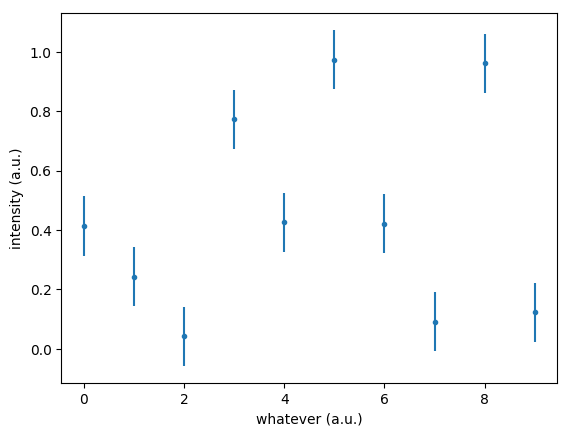

PyObject Text(24,0.5,'intensity (a.u.)')

In [7]:
errorbar(0:9, rand(10), fmt = ".", yerr = 0.1)
xlabel("whatever (a.u.)")
ylabel("intensity (a.u.)")

# Calling C

In [8]:
ccall((:clock, "libc"), Int32, ())

23020496

In [9]:
ccall((:getenv, "libc"), Cstring, (Cstring,), "SHELL") |> unsafe_string

"/usr/local/bin/fish"

Can easily wrap functions:

In [156]:
getenv(v) = ccall((:getenv, "libc"), Cstring, (Cstring,), v) |> unsafe_string

getenv (generic function with 1 method)

In [157]:
getenv("HOME")

"/Users/rawlik"

# C++ integration

In [11]:
using Cxx

In [12]:
cxx""" #include<iostream> """

true

In [13]:
cxx"""  
  void mycppfunction() {   
    int z = 0;
    int y = 4;
    int x = 10;
    z = x*y + 2;
    std::cout << "The number is " << z << std::endl;
 }
"""

true

In [14]:
julia_function() = @cxx mycppfunction()

julia_function (generic function with 1 method)

In [15]:
julia_function()

The number is 42
